In [1]:
#heart_RandomForest

#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
heart_df=pd.read_csv('heart.csv')
y=heart_df.iloc[:,13].values
x=heart_df.iloc[:,0:9]

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


correlation matrix:
                age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.0

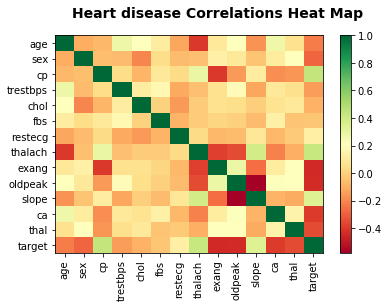

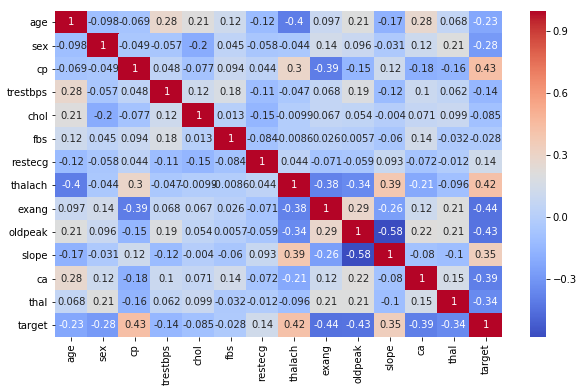

In [6]:
#Plotting Correlation Matrix
corr=heart_df.corr()
print('correlation matrix:\n',corr)
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle('Heart disease Correlations Heat Map', fontsize=14, fontweight='bold')
plt.show()

#Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(heart_df.corr(),cmap='coolwarm',annot=True)


In [7]:
heart_df.drop(columns=['trestbps','restecg','ca','oldpeak'],inplace=True)
heart_df

,age,sex,cp,chol,fbs,thalach,exang,slope,thal,target
0,63,1,3,233,1,150,0,0,1,1
1,37,1,2,250,0,187,0,0,2,1
2,41,0,1,204,0,172,0,2,2,1
3,56,1,1,236,0,178,0,2,2,1
4,57,0,0,354,0,163,1,2,2,1
5,57,1,0,192,0,148,0,1,1,1
6,56,0,1,294,0,153,0,1,2,1
7,44,1,1,263,0,173,0,2,3,1
8,52,1,2,199,1,162,0,2,3,1
9,57,1,2,168,0,174,0,2,2,1


In [8]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

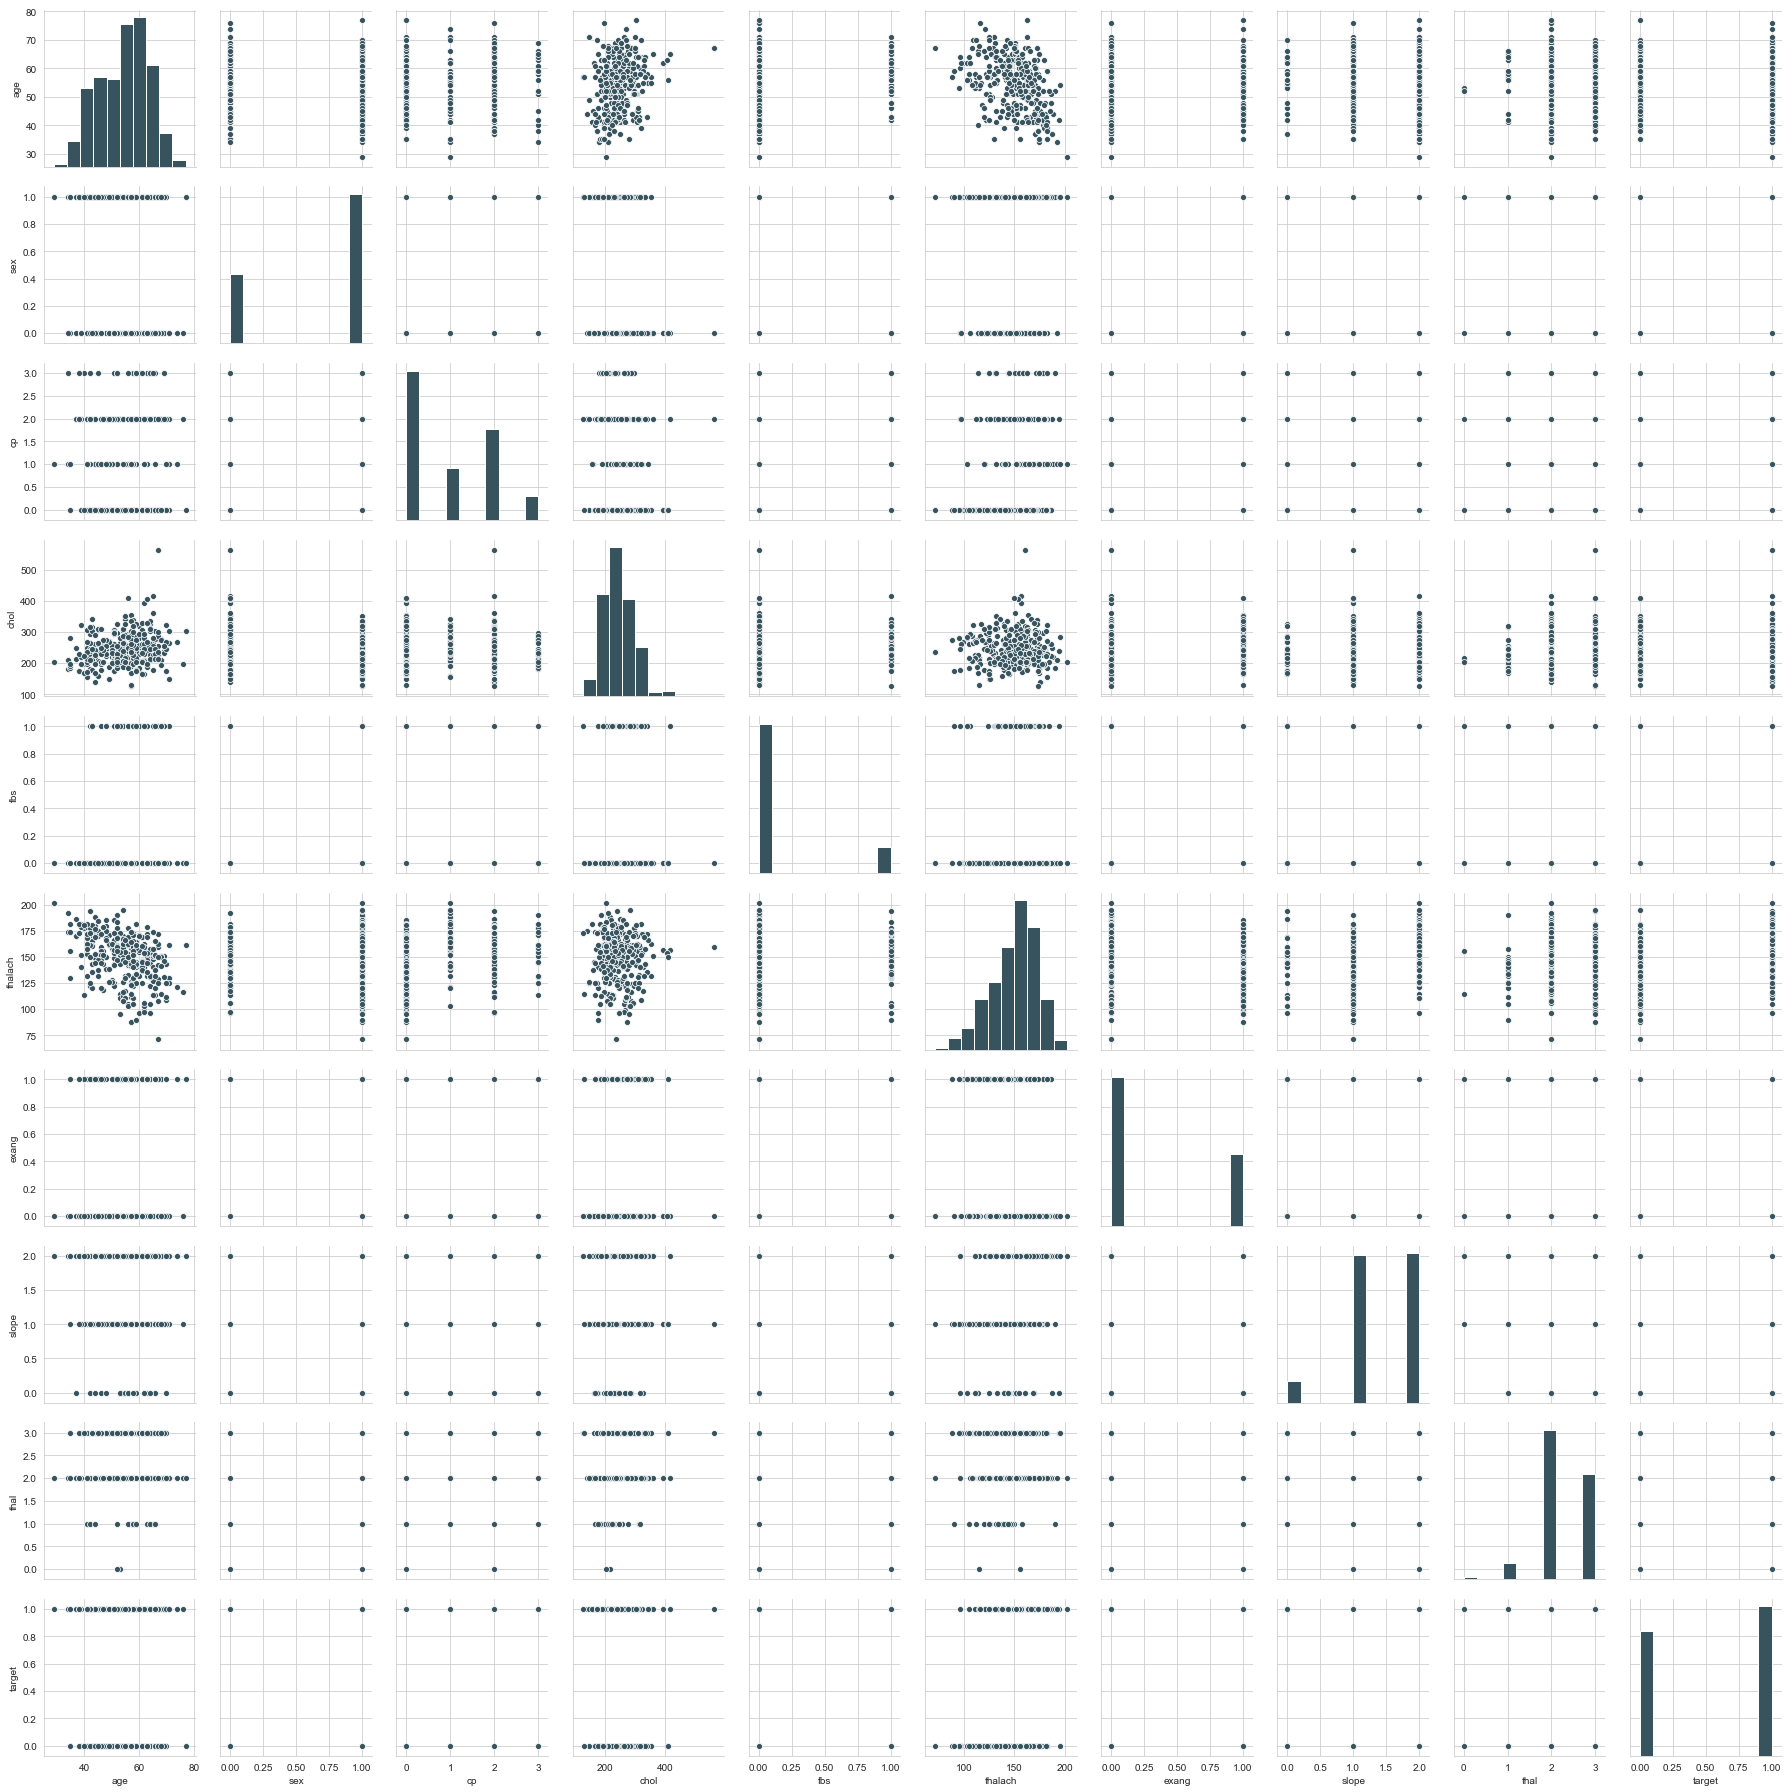

In [9]:
sns.pairplot(heart_df)

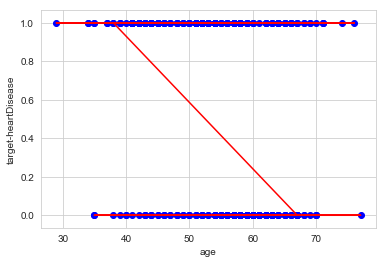

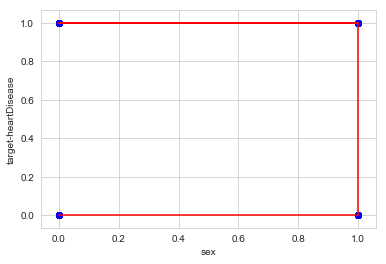

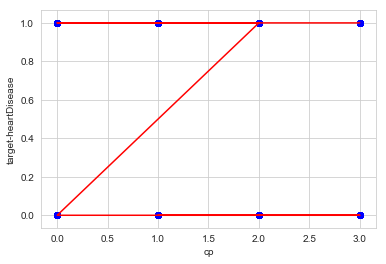

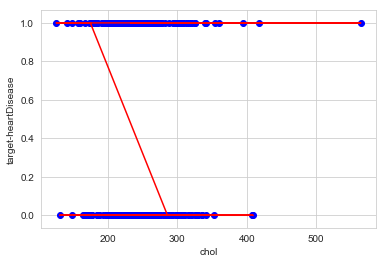

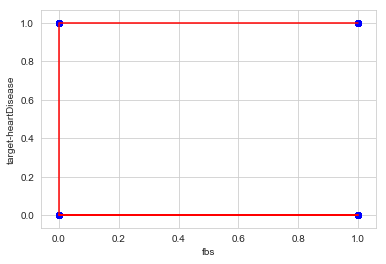

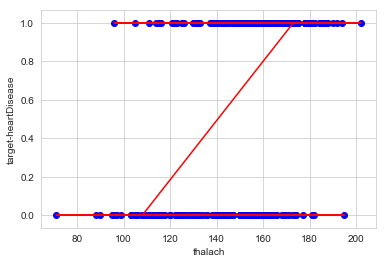

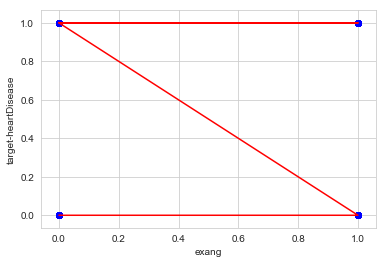

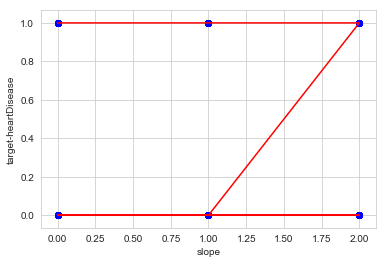

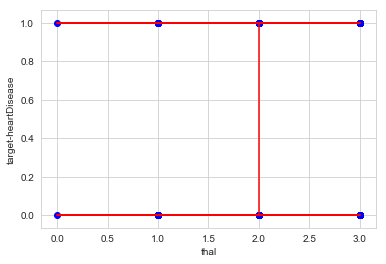

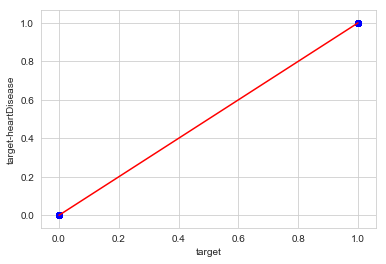

In [10]:
#Visualization techniques
col=heart_df.columns
col
#Sactterplot
for i in col:
    plt.scatter(heart_df[i],heart_df['target'],color='b')
    plt.plot(heart_df[i],heart_df['target'],color='r')
    plt.xlabel(i)
    plt.ylabel('target-heartDisease')
    plt.show()

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


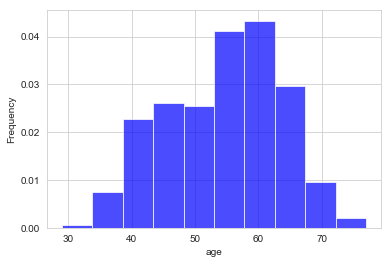

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


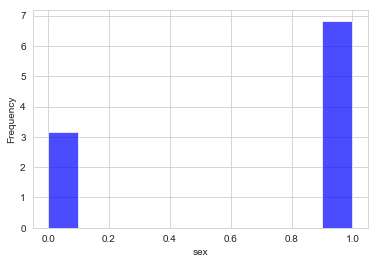

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


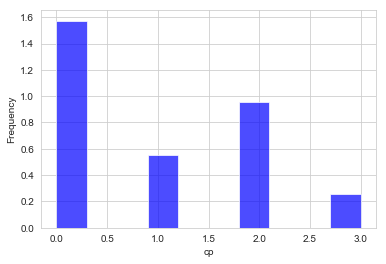

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


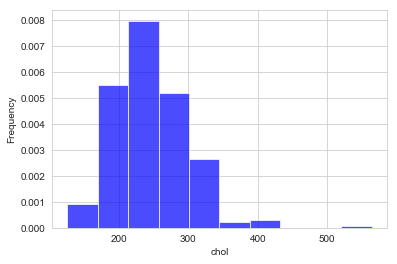

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


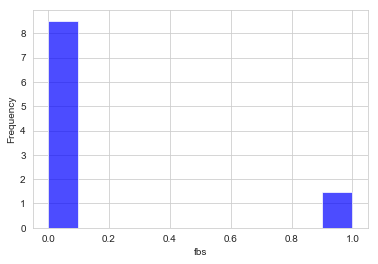

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


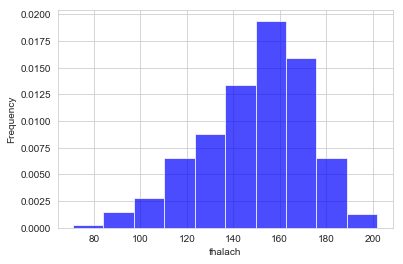

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


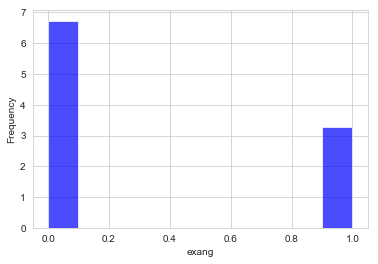

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


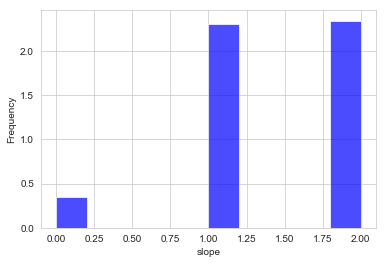

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


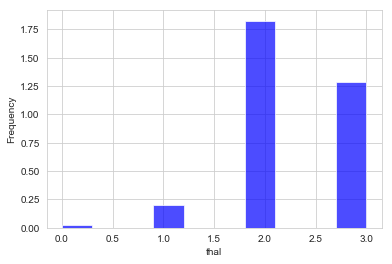

C:\Users\sunny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


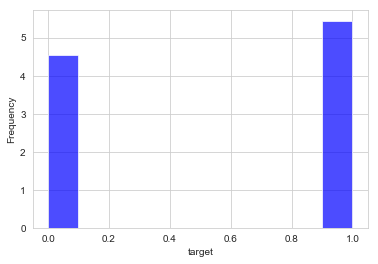

In [11]:
#Histogram
for i in col:
    plt.hist(heart_df[i],bins=10,normed=1, facecolor='blue', alpha=0.7)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

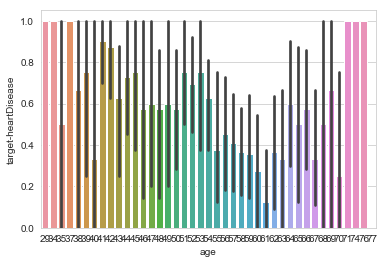

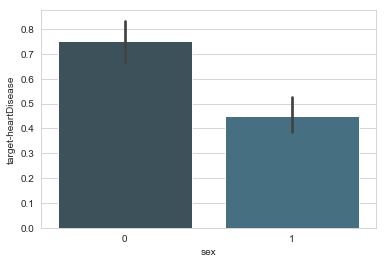

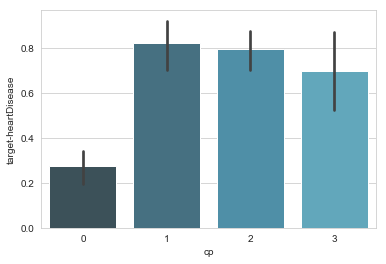

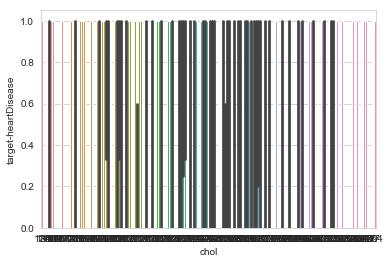

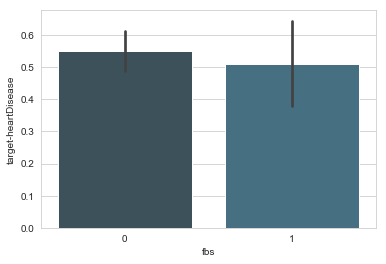

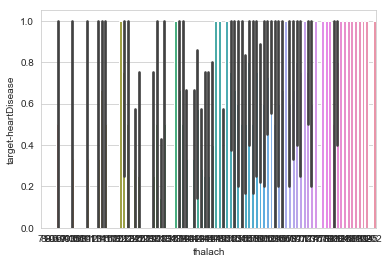

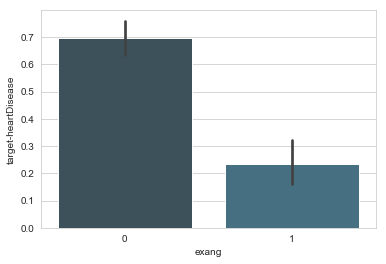

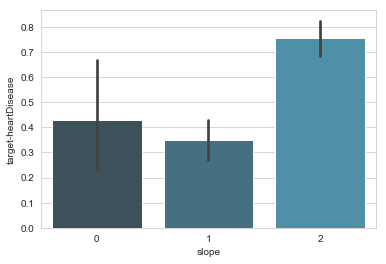

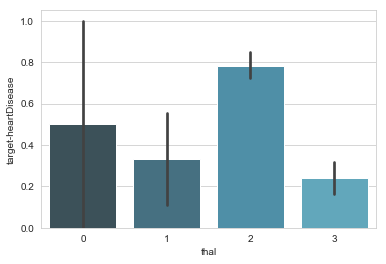

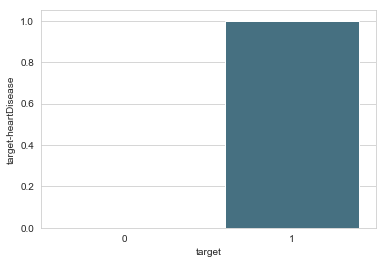

In [12]:
#Barplot
for i in col:
    sns.barplot(heart_df[i],heart_df['target'])
    plt.xlabel(i)
    plt.ylabel('target-heartDisease')
    plt.show()

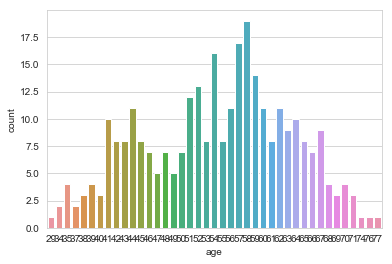

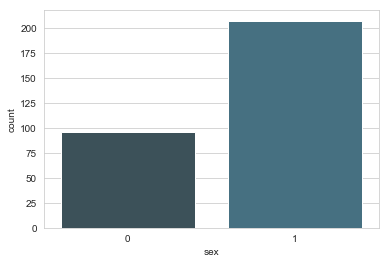

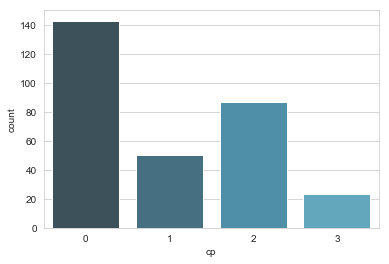

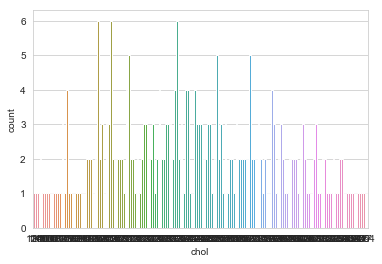

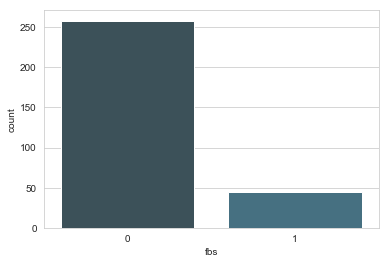

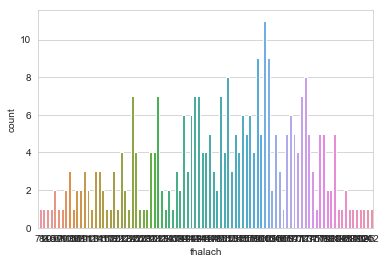

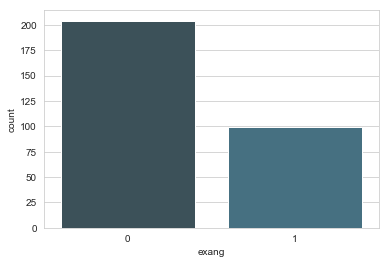

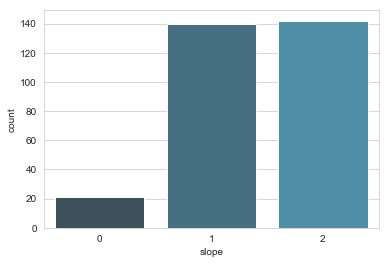

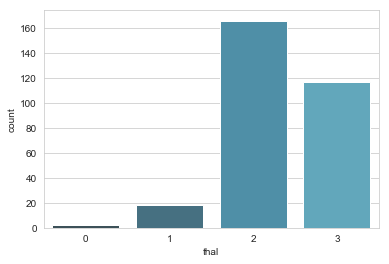

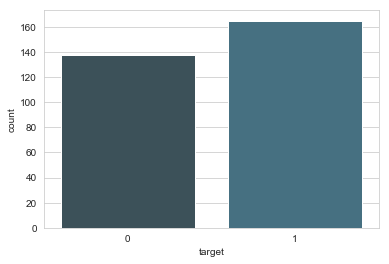

In [13]:
#Countplot
for i in col:
    sns.countplot(x=i,data=heart_df)
    plt.xlabel(i)
    plt.show()

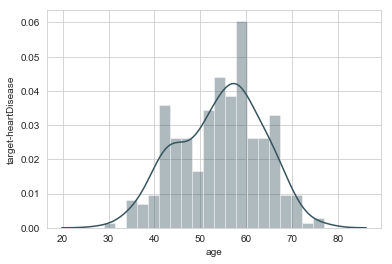

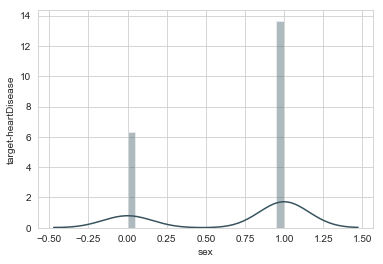

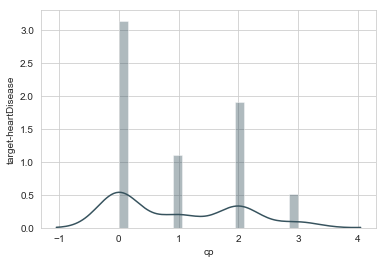

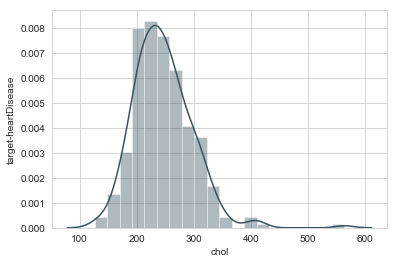

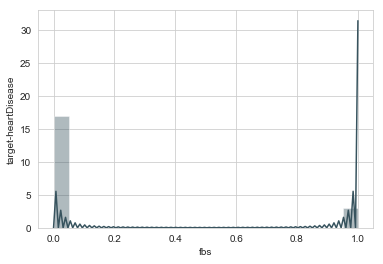

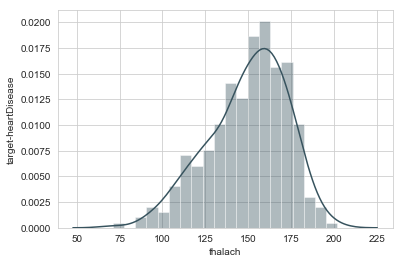

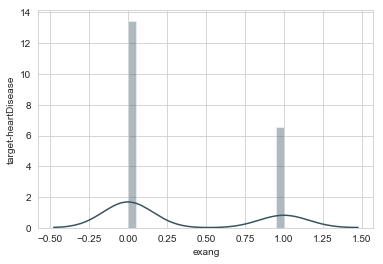

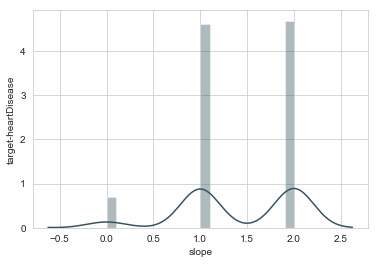

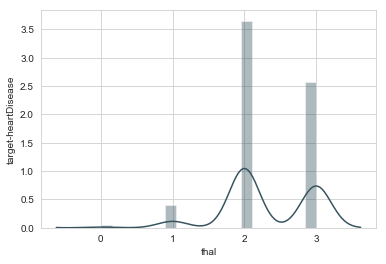

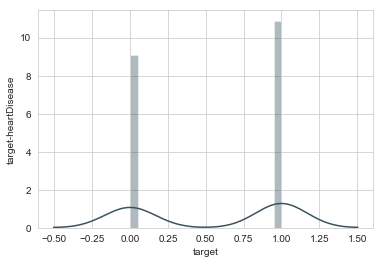

In [15]:
#Distplot
for i in col:
    sns.distplot(heart_df[i],bins=20,kde=True)
    plt.xlabel(i)
    plt.ylabel('target-heartDisease')
    plt.show()

In [16]:
#Splitting the dataset into train & test sets 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_test

C:\Users\sunny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sunny\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sunny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sunny\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.88467414e+00,  6.17914381e-01, -1.00073126e+00,
         7.34146768e-01, -1.58011928e+00, -3.89249472e-01,
         9.23936435e-01, -1.17273867e+00,  1.61834719e+00],
       [ 1.21794690e+00,  6.17914381e-01,  2.08260290e+00,
         2.09766471e+00, -3.50459223e-01, -3.89249472e-01,
        -1.08232554e+00,  2.19163552e-01, -6.17914381e-01],
       [ 6.62340871e-01,  6.17914381e-01,  2.08260290e+00,
         2.09766471e+00,  1.06480990e+00, -3.89249472e-01,
        -1.08232554e+00,  4.04750515e-01, -6.17914381e-01],
       [ 7.73462077e-01,  6.17914381e-01, -1.00073126e+00,
        -3.56667589e-01,  3.68775907e-01, -3.89249472e-01,
        -1.08232554e+00, -4.30390820e-01,  1.61834719e+00],
       [ 9.95704489e-01,  6.17914381e-01,  1.05482484e+00,
        -8.39639998e-02, -2.57654690e-01, -3.89249472e-01,
         9.23936435e-01, -1.98407115e-01, -6.17914381e-01],
       [-5.59992392e-01,  6.17914381e-01, -1.00073126e+00,
        -4.11208307e-01,  7.39994039e-01, -3.892494

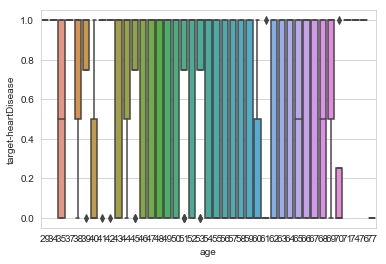

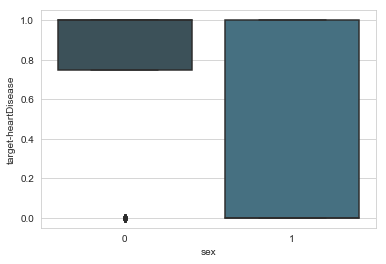

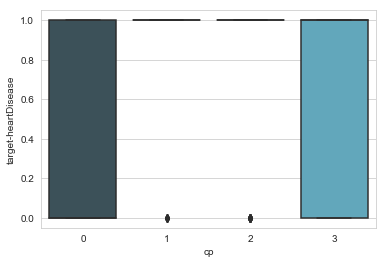

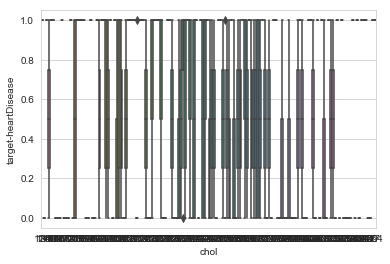

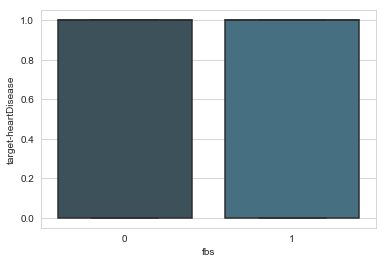

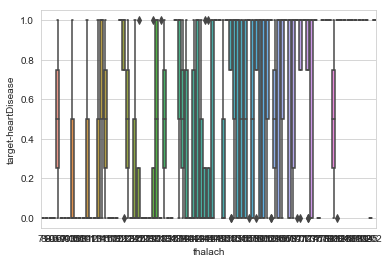

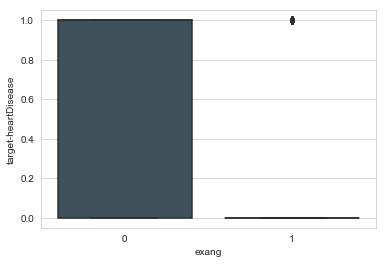

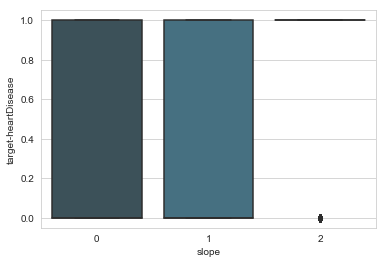

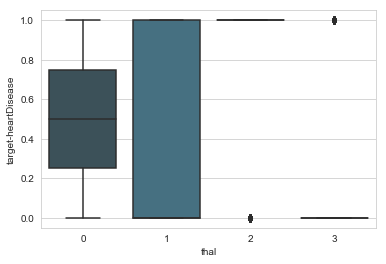

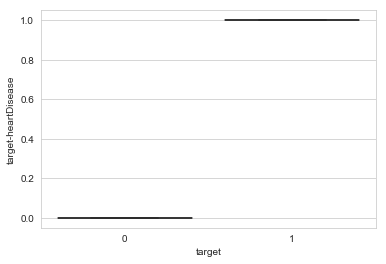

In [17]:
#Boxplot
for i in col:
    sns.boxplot(x=i,y='target',data=heart_df)
    plt.xlabel(i)
    plt.ylabel('target-heartDisease')
    plt.show()

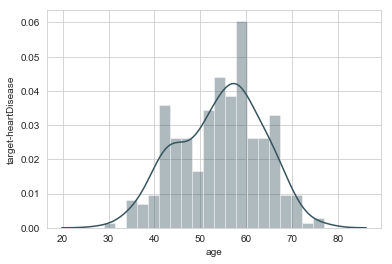

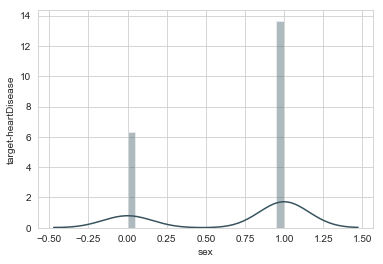

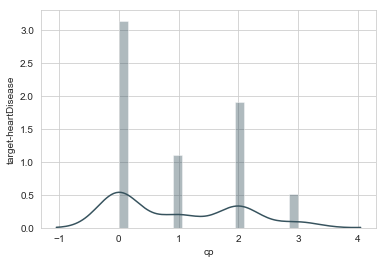

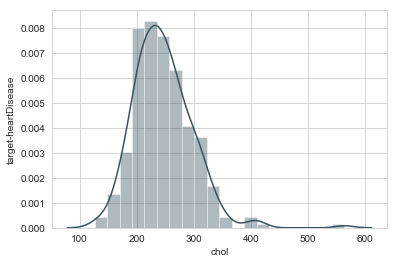

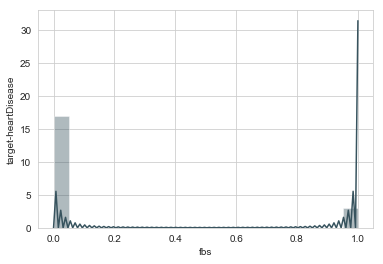

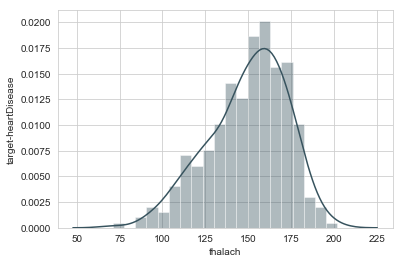

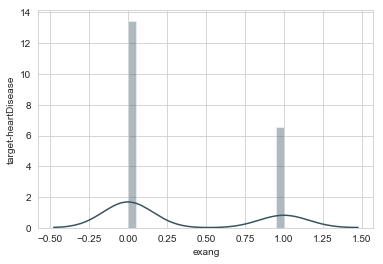

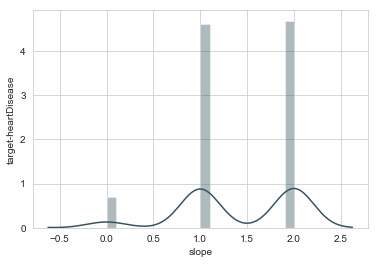

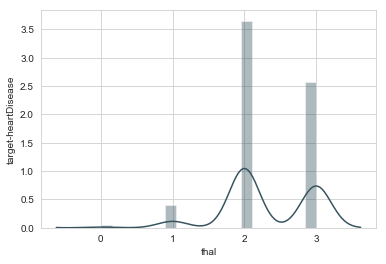

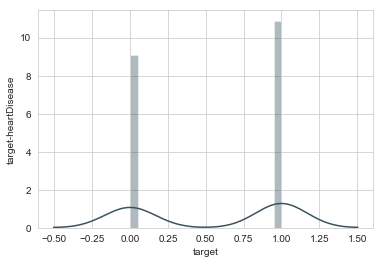

In [19]:
#Distplot
for i in col:
    sns.distplot(heart_df[i],bins=20,kde=True)
    plt.xlabel(i)
    plt.ylabel('target-heartDisease')
    plt.show()

In [20]:
#Fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
#Predicting the target label
y_pred=classifier.predict(x_test)

Confusion Matrix
 [[26  7]
 [ 7 36]]


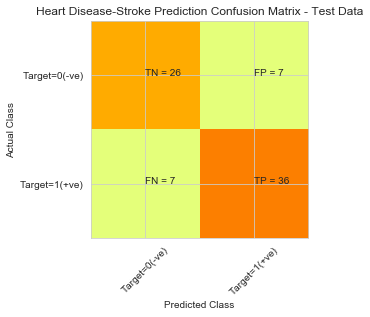

In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)

#Confusion matix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Target=0(-ve)','Target=1(+ve)']
plt.title('Heart Disease-Stroke Prediction Confusion Matrix - Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()



In [23]:
#Analysing Classification_report
from sklearn.metrics import classification_report,roc_curve,auc,accuracy_score
report=classification_report(y_test,y_pred)
print('Classification Report:\n',report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.84      0.84      0.84        43

   micro avg       0.82      0.82      0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76




FPR=  [0.         0.21212121 1.        ] TPR=  [0.        0.8372093 1.       ] AUC= 0.8125440451021847

ROC Curve:



Text(0.5, 0, 'fpr')

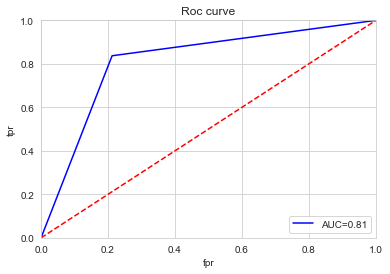

In [24]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
auc=auc(fpr,tpr)
print('\nFPR= ',fpr,'TPR= ',tpr,'AUC=',auc)

#Plotting the ROC curve
print('\nROC Curve:\n')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title('Roc curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')


In [25]:
#Calculating Accuracy of model
accurate=accuracy_score(y_test,y_pred)
print('\nAccuracy_score=',accurate)


Accuracy_score= 0.8157894736842105
